## Nama : Aufa Nabil Amiri
## NRP : 0721 17 4000 0029
### Subject : Random Forest
---

### Import Required Library
digunakan untuk mengimport semua library python yang dibutuhkan untuk project ini.

In [71]:
#Import scikit-learn dataset library
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

### Load Iris Dataset
Load dataset bawaan dari sklearn, yaitu Iris dataset yang akan digunakan untuk random forest.

In [72]:
#Load dataset
iris = datasets.load_iris()

### Memilah data
Mengkategorikan data yang didapat dari iris, dikategorikan dalam kolom nya masing - masing.

In [73]:
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

### Memisahkan data
Memisahkan data antara feature dan labelnya, yang kemudian dibagi lagi untuk train dan test

In [74]:
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

### Membuat Random Forest Model
membuat random forest model berdasarkan pada data training dan menampilkan akurasi model dengan membandingkan dengan data test

In [75]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


### Mendapatkan fitur yang memiliki pengaruh paling besar dari model & Divisualisasikan

Fitur ini akan berguna bagi kita untuk melakukan optimisasi dari model kita, karena bisa digunakan untuk menghilangkan noise

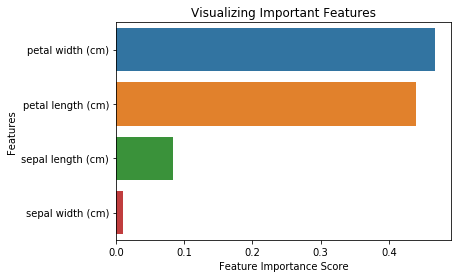

In [76]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


### Melakukan Optimisasi
dari fitur yang didapat di atas, bisa dilakukan optimisasi dengan menghilangkan noise atau data yang misleading, dalam hal ini data yang dianggap noise adalah **sepal width** karena memiliki fitur yang paling kecil.

In [77]:
X=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal width"
y=data['species']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

### Test Optimisasi yang dilakukan

In [78]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9428571428571428


### Kesimpulan
di dapat kesimpulan bahwa apabila dilakukan optimisasi dengan cara menghilangkan noise ( dalam hal ini fitur yang memiliki 'importance' paling kecil ) maka dapat menaikkan hasil dari random forest model kita.